In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
X = np.arange(0,5,0.13)
print(X[:3])
y = 1.229*X + 9.887
print(y[:3])
print(len(X), len(y))

[0.   0.13 0.26]
[ 9.887   10.04677 10.20654]
39 39


In [33]:
split = int(len(X)*0.8)
print(split)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


31


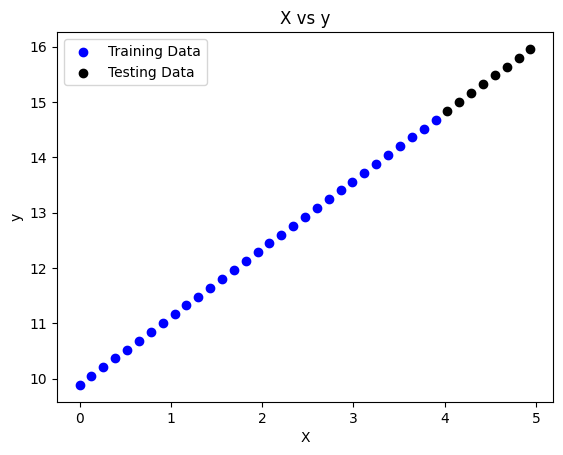

In [34]:
def plot_data(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test , predictions= None):
    plt.scatter(X_train,y_train, c= 'Blue',  label = 'Training Data')
    plt.scatter(X_test, y_test, c='Black', label = 'Testing Data')
    if predictions is not None:
        plt.plot(X_test, predictions, c ='Green', label = 'Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('X vs y')
    plt.legend()
    plt.show()
plot_data()

In [35]:
w = np.random.randn()
b = np.random.randn()
print(f"Intially, w = {w} and b = {b}")


Intially, w = 1.8651157033637915 and b = -0.3876715777993124


In [36]:
def loss_fn(y_actual, y_out):
    return np.sum(np.square(y_actual - y_out))/len(y_actual)


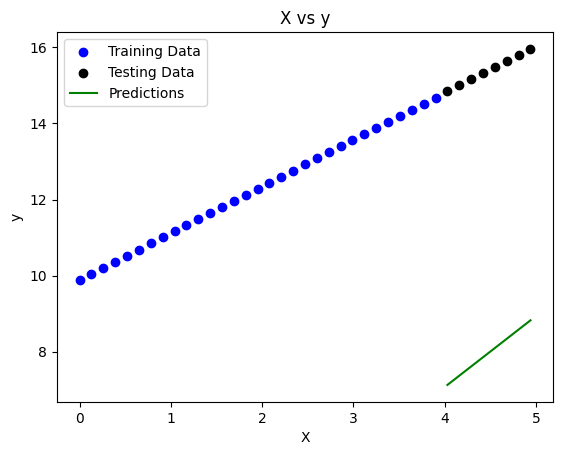

In [37]:
y_out = X_test*w + b
plot_data(predictions=y_out)

In [38]:
lr = 0.1
epochs = 200
train_loss_list = []
test_loss_list = []
for epoch in range(epochs):
    #forward pass
    train_preds = X_train*w + b
    #compute loss
    train_loss = loss_fn(y_actual=y_train, y_out = train_preds)
    #compute the gradients
    gradientW = (-2/len(X_train))*np.sum((y_train - train_preds)*X_train)
    gradientb = (-2/len(X_train))*np.sum((y_train - train_preds))
    #backpropgate
    w = w- gradientW * lr
    b = b- gradientb * lr
    #testing
    test_preds = X_test*w + b
    test_loss = loss_fn(y_actual=y_test, y_out=test_preds)

    if (epoch+1)%10 == 0:
        print(f"Epoch {epoch+1} | Train loss {train_loss:.4f}| Trainloss{test_loss:.4f}")
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)    




Epoch 10 | Train loss 9.4291| Trainloss20.0155
Epoch 20 | Train loss 3.7054| Trainloss7.8656
Epoch 30 | Train loss 1.4561| Trainloss3.0910
Epoch 40 | Train loss 0.5722| Trainloss1.2147
Epoch 50 | Train loss 0.2249| Trainloss0.4773
Epoch 60 | Train loss 0.0884| Trainloss0.1876
Epoch 70 | Train loss 0.0347| Trainloss0.0737
Epoch 80 | Train loss 0.0136| Trainloss0.0290
Epoch 90 | Train loss 0.0054| Trainloss0.0114
Epoch 100 | Train loss 0.0021| Trainloss0.0045
Epoch 110 | Train loss 0.0008| Trainloss0.0018
Epoch 120 | Train loss 0.0003| Trainloss0.0007
Epoch 130 | Train loss 0.0001| Trainloss0.0003
Epoch 140 | Train loss 0.0001| Trainloss0.0001
Epoch 150 | Train loss 0.0000| Trainloss0.0000
Epoch 160 | Train loss 0.0000| Trainloss0.0000
Epoch 170 | Train loss 0.0000| Trainloss0.0000
Epoch 180 | Train loss 0.0000| Trainloss0.0000
Epoch 190 | Train loss 0.0000| Trainloss0.0000
Epoch 200 | Train loss 0.0000| Trainloss0.0000


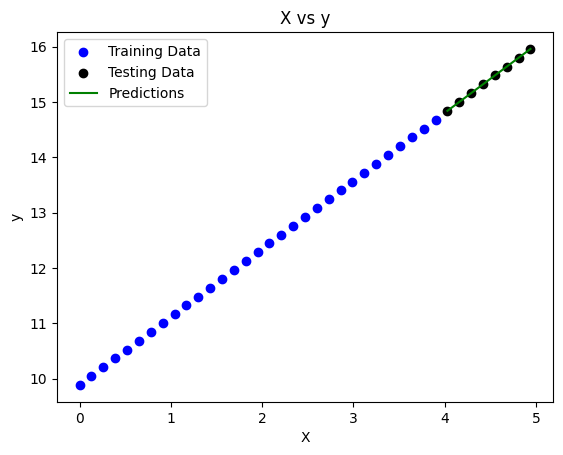

In [39]:
y_out = X_test*w + b
plot_data(predictions=y_out)

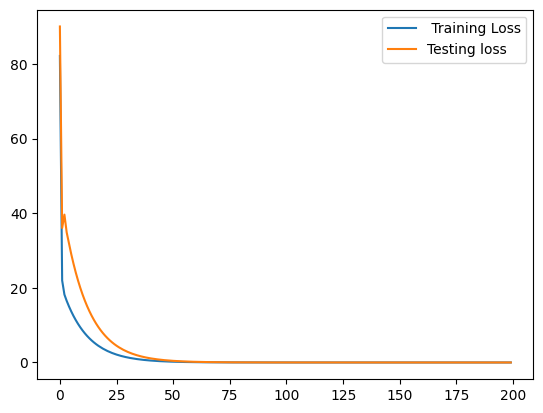

In [40]:
#plot show
plt.plot(range(epochs), train_loss_list, label = ' Training Loss')
plt.plot(range(epochs), test_loss_list, label = 'Testing loss')
plt.legend()
plt.show()